In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import scipy.fftpack
import pyproj
from pyproj import Proj
import os
from bokeh.plotting import figure, output_file, show
from bokeh.charts import BoxPlot, output_file, show
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
path = 'adcp_data/'
listing = os.listdir(path)
print listing

['sullivanpt_005min.mat', 'sullivanpt_005min_histogram.mat', 'sullivanpt_2nd_deployment_005min.mat', 'sullivanpt_2nd_deployment_005min_histogram.mat', 'walkerst_005min.mat', 'walker_005min_histogram.mat', 'wymanst_005min.mat', 'wyman_005_histogram.mat']


In [3]:
sullivan1 = io.loadmat(path + listing[1])
sullivan2 = io.loadmat(path + listing[3])
walker = io.loadmat(path + listing[5])
wyman = io.loadmat(path + listing[7])

In [4]:
sites = {'Sullivan Point':io.loadmat(path + listing[1]),'Sullivan Redeploy':io.loadmat(path + listing[3]),
         "Walker St. Bridge":io.loadmat(path + listing[5]), 'Wyman Ave. Bridge':io.loadmat(path + listing [7])}

In [6]:
for item in sites:
    infile = item
    print '%s' % item
    #print sites[infile]['cmag']

Walker St. Bridge
Sullivan Point
Wyman Ave. Bridge
Sullivan Redeploy


In [7]:
sites[infile]['zbins']
bins = range(1,sites[infile]['zbins'].size+1)
bins

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [8]:
bins = range(1,sites[infile]['zbins'].size+1)
df = pd.DataFrame(sites[infile]['cmag'], index=sites[infile]['ta'],columns=bins)
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7983.000000,0,0,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,0.537684,NaN,NaN,0.835541,0.874258,0.901581,0.921741,0.936057,0.945216,0.950546,0.952946,0.953519,0.952931,0.951362,0.949278,0.946582,0.943731,0.940446
std,0.296557,NaN,NaN,0.430758,0.447883,0.459202,0.466929,0.472182,0.474892,0.476107,0.476313,0.476073,0.475170,0.473541,0.472282,0.470868,0.469285,0.467661
min,0.001626,NaN,NaN,0.003606,0.002828,0.003162,0.005000,0.003162,0.005385,0.005099,0.004123,0.002828,0.001000,0.004472,0.003606,0.001414,0.003606,0.004123
25%,0.314884,NaN,NaN,0.531207,0.562100,0.585346,0.599364,0.611542,0.616001,0.615060,0.609266,0.603571,0.604026,0.599036,0.596342,0.594952,0.587956,0.583973
50%,0.513450,NaN,NaN,0.838869,0.882913,0.915999,0.938698,0.961052,0.975293,0.986396,0.996717,1.003743,1.008147,1.012871,1.013017,1.015250,1.014327,1.010617
75%,0.706508,NaN,NaN,1.074410,1.127432,1.165449,1.192631,1.219664,1.237178,1.249344,1.258937,1.264536,1.268723,1.267426,1.267585,1.266213,1.263200,1.260485
max,1.435689,NaN,NaN,2.124652,2.163318,2.211069,2.214892,2.212963,2.189264,2.177546,2.176284,2.176280,2.172826,2.172169,2.173458,2.177166,2.173878,2.160396


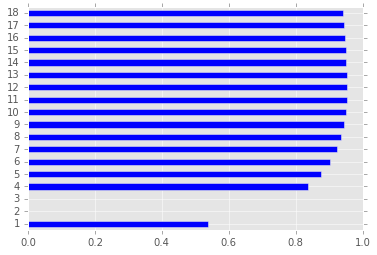

In [9]:
plt.figure(); df.mean().plot.barh();

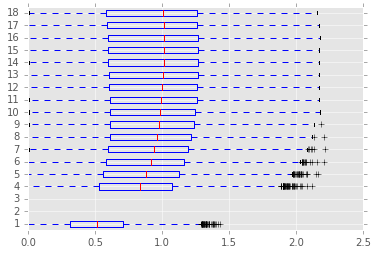

In [370]:
df.plot(kind='box', vert=False);

In [305]:
def keyed(mat):
    keys = mat.keys()
    
    for i in keys:
        try:
            print i, mat[i].shape
            pass
        except AttributeError:
            print '... Error'
            continue

In [11]:
def histoPlot(velocity, Depth, site, j, saveit):
    plt.clf()
    weights = np.ones_like(velocity[~np.isnan(velocity)])/len(velocity[~np.isnan(velocity)])
    n, bins, patches = plt.hist(velocity[~np.isnan(velocity)],bins=20, facecolor='green', weights=weights, alpha=0.9)
    
    plt.xlabel('Current Velocity [m/s]')
    plt.ylabel('Observation')
    plt.title(r'Bin %d (%.1fm from Seafloor) at %s' % (j, Depth, site))
    #plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
    
    if saveit == 'True':
        directory = 'TimeSeries_Histograms/%s/' %site
        saveloc = '%s%s_Bin%r.png' % (directory, site, j)
    
        if not os.path.exists(directory):
            os.makedirs(directory)
    
        plt.savefig(saveloc)

In [14]:
infile = wyman
Site = 'Wyman Ave. Bridge'
days = np.squeeze(infile['ta'].T)
VeloBins = infile['cmag']
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])
BinDepth =  infile['zbins'].T

print np.nanmax(yMin)
print np.nanmax(yMax)
print np.nanmean(yMean)
print np.nanmax(yPres) - np.nanmin(yPres)
print np.nanmean(yMin)
print np.nanmean(yMax)
print np.nanmean(infile['cmag'])

1.69389516795
2.00345561468
0.882834614073
3.832079328
0.784490718417
0.932742358997
0.912739440392


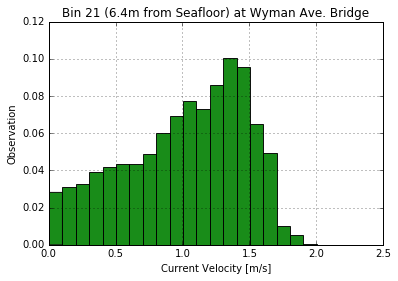

In [289]:
for col in range(VeloBins.shape[1]):
    j = col + 1
    try:
        histoPlot(VeloBins[:,col], BinDepth[col][0], Site, j, 'True')
        pass
    except AttributeError:
            print '%r... Error' % j
            continue

In [136]:
# Generate some synthetic time series for six different categories
#cats = list("abcdef")
#yy = np.random.randn(2000)
#g = np.random.choice(cats, 2000)
#for i, l in enumerate(cats):
#    yy[g == l] += i // 2
#df = pd.DataFrame(dict(score=yy, group=g))

# Find the quartiles and IQR foor each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat][0]) | (group.score < lower.loc[cat][0])]['score']
out = groups.apply(outliers).dropna()

# Prepare outlier data for plotting, we need coordinate for every outlier.
outx = []
outy = []
for cat in cats:
    # only add outliers if they exist
    if not out.loc[cat].empty:
        for value in out[cat]:
            outx.append(cat)
            outy.append(value)

output_file("boxplot.html")

p = figure(tools="save", background_fill="#EFE8E2", title="", x_range=cats)

# If no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.iloc[:,0]),upper.score) ]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.iloc[:,0]),lower.score) ]

# stems
p.segment(cats, upper.score, cats, q3.score, line_width=2, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_width=2, line_color="black")

# boxes
p.rect(cats, (q3.score+q2.score)/2, 0.7, q3.score-q2.score,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(cats, (q2.score+q1.score)/2, 0.7, q2.score-q1.score,
    fill_color="#3B8686", line_width=2, line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

# outliers
p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

show(p)